# Optical Character Recognition (OCR) - Azure Cognitive Services

## Step 0 Import Libraries

First, We need to import all the necessary libraries for this projet.

In [1]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO
import matplotlib
import matplotlib.font_manager as font_manager
from os import path

### Set the Azure Credentials

For calling the API, we need the endpoint and the subscription key of the Azure account. The following code is commonly used for storing this sensitive information. Once you run them, you can remove the code and call them back again using the os.environ['variable_name'].

In [ ]:
# Set the Azure Credentials
#os.environ['COMPUTER_VISION_ENDPOINT'] = 'endpoint-info'
#os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY'] = 'suscription-key-info'

## Step 1 Fonts Path

https://ipafont.ipa.go.jp/old/ipafont/download.html

In [2]:
#Set the fonts path
font_path = path.expanduser(r'E:\Users\Usuario\Documents\OCR project\OCR_project\Fonts\IPAMTTC00303\ipam.ttc')


# Step 2 Call OCR API

In [5]:

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

ocr_url = endpoint + "vision/v3.0/ocr"

# Set image_url to the URL of an image that you want to analyze.
image_url = 'https://github.com/RohanAlexander/japanese_dictionaries/blob/master/inputs/00-sample-pages_1-cropped.png?raw=true'


headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'ja', 'detectOrientation': 'true'} #Can also be used 'language': 'unk' for self detection 
data = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos


[{'boundingBox': '1525,70,25,6', 'text': '一'},
 {'boundingBox': '1522,88,28,26', 'text': '本'},
 {'boundingBox': '1525,117,24,20', 'text': 'の'},
 {'boundingBox': '1525,143,26,25', 'text': '傘'},
 {'boundingBox': '1525,170,25,35', 'text': 'を'},
 {'boundingBox': '1525,213,26,6', 'text': '一'},
 {'boundingBox': '1523,223,27,26', 'text': '人'},
 {'boundingBox': '1526,252,24,25', 'text': 'で'},
 {'boundingBox': '1529,280,14,22', 'text': 'さ'},
 {'boundingBox': '1526,305,23,25', 'text': 'す'},
 {'boundingBox': '1531,335,14,22', 'text': 'こ'},
 {'boundingBox': '1529,362,14,25', 'text': 'と'},
 {'boundingBox': '1539,387,12,14', 'text': '。'},
 {'boundingBox': '1525,414,25,26', 'text': '多'},
 {'boundingBox': '1530,441,12,26', 'text': 'く'},
 {'boundingBox': '1523,469,27,25', 'text': '男'},
 {'boundingBox': '1523,496,27,26', 'text': '女'},
 {'boundingBox': '1525,527,27,19', 'text': 'ニ'},
 {'boundingBox': '1523,551,28,25', 'text': '人'},
 {'boundingBox': '1526,581,24,21', 'text': 'の'},
 {'boundingBox': '1523,6

In [6]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [7]:
image.size

(1588, 2776)

# Print characters over the canvas

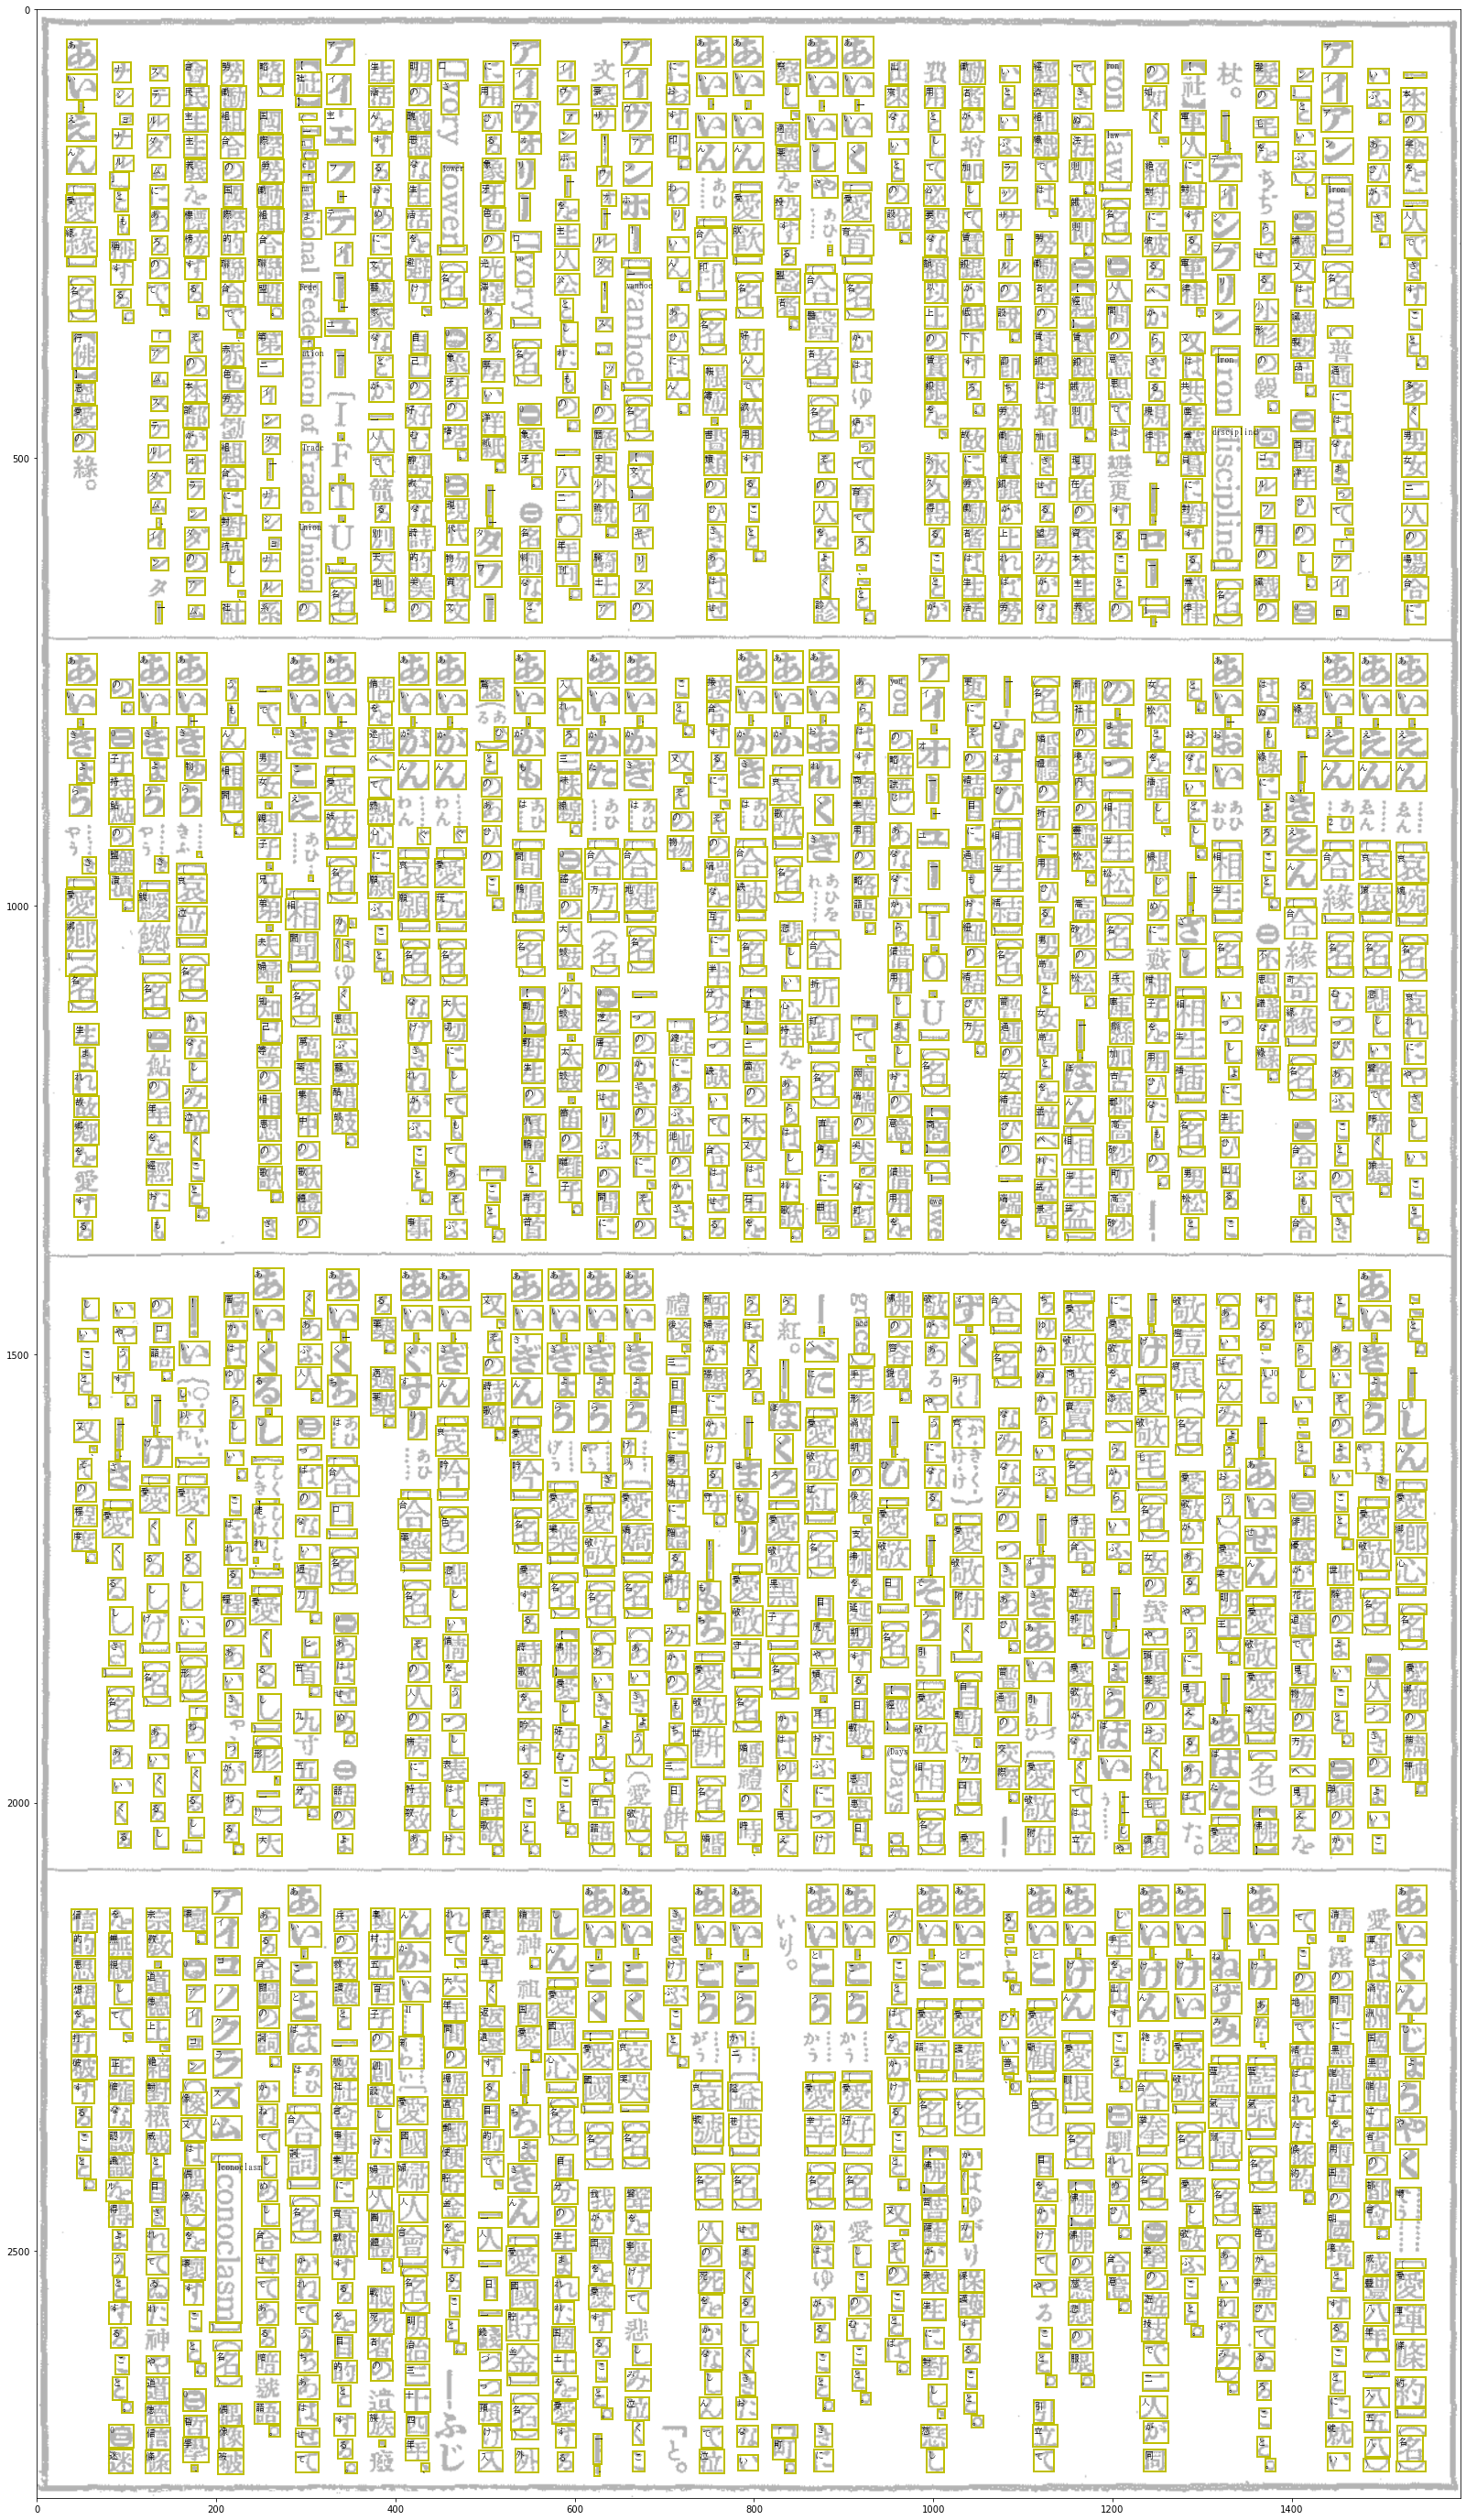

(0.0, 1.0, 0.0, 1.0)

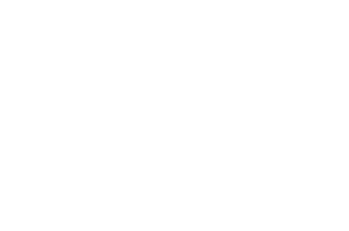

In [8]:
font = font_manager.FontProperties(fname=font_path)#'/Users/user/Downloads/IPAfont00303/ipag.ttf')
#plt.rcParams["font.family"]="sans-serif"

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(50,50))
ax = plt.imshow(image, alpha=0.3)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    #print(text)
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y', label = 'label')
    ax.axes.add_patch(patch)
    
    ax.axes.text(origin[0], origin[1], text, size = 20, weight="bold", va="top", fontproperties = font) 
plt.show()
plt.axis("off")

# Print Image 

In [19]:
image_url

'https://github.com/RohanAlexander/japanese_dictionaries/blob/master/inputs/00-sample-pages_1-cropped.png?raw=true'

In [20]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))


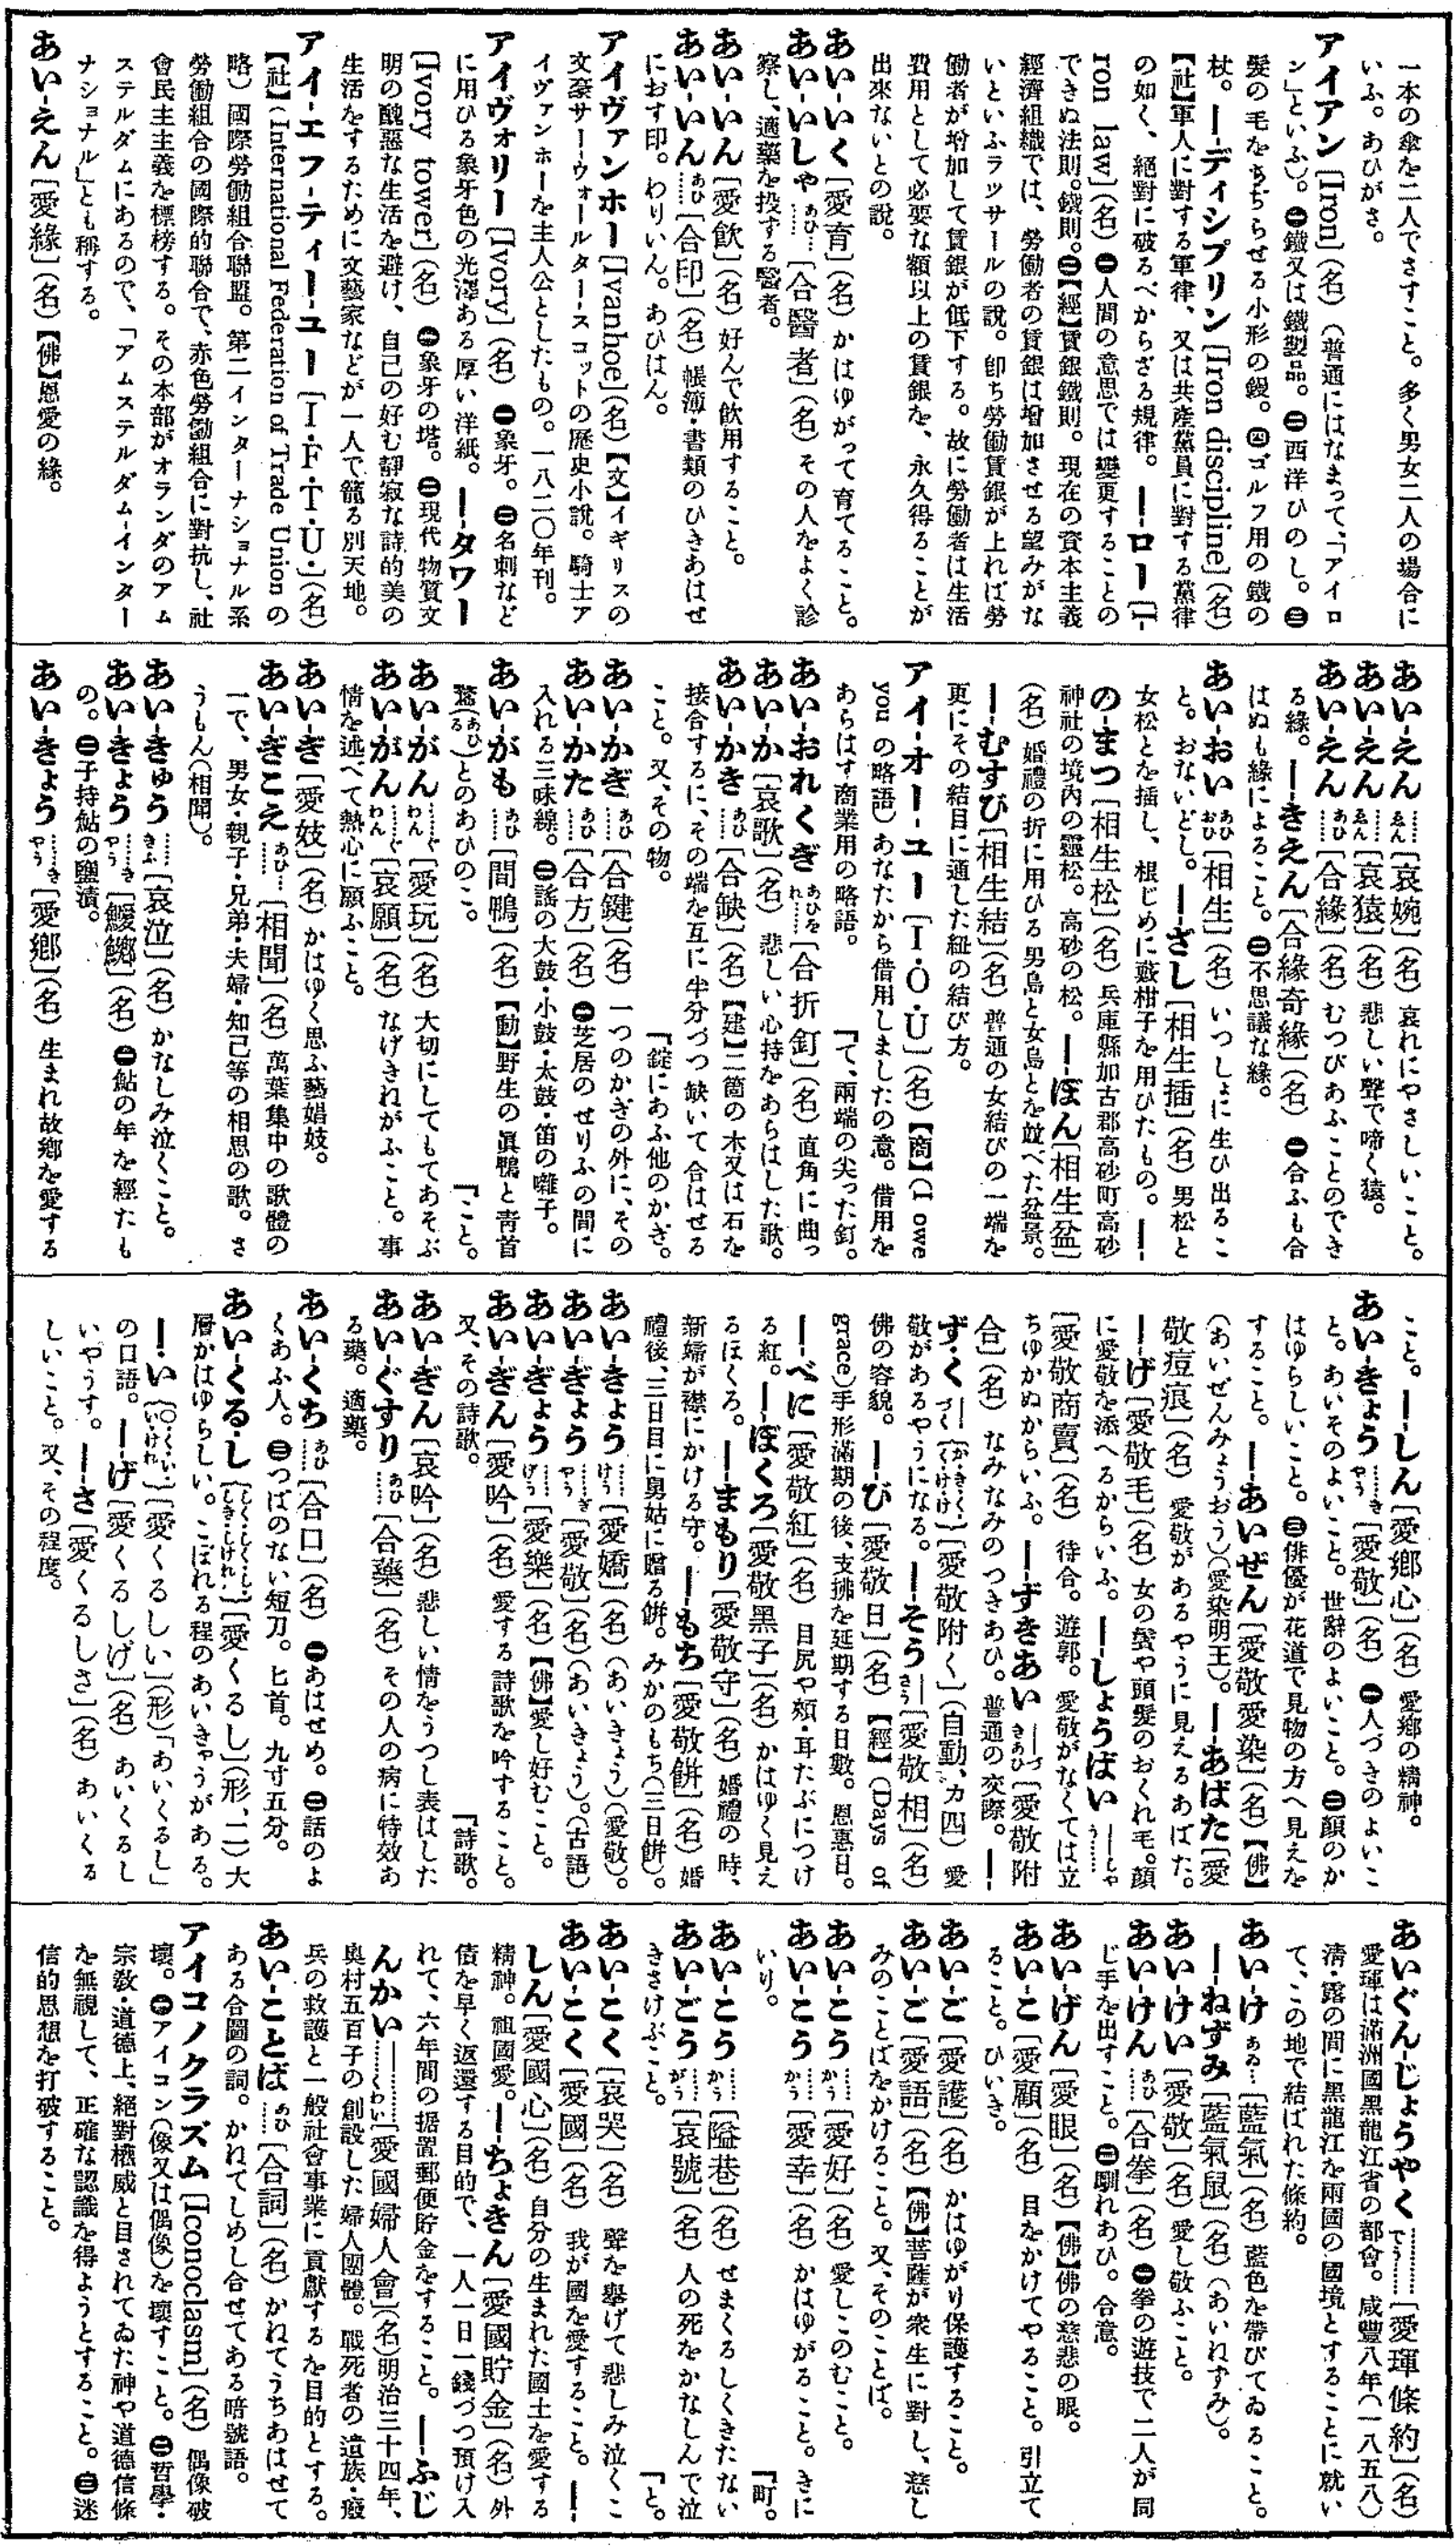

In [21]:
img